In [1]:
# ワーニングメッセージを非表示にする
import warnings
warnings.simplefilter("ignore")

# データ分析によく使われるライブラリをインポートする
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Matplotlibを使っている際に、日本語のフォントを使うためのライブラリ
import japanize_matplotlib

# Jupyter NotebookでMatplotlibのグラフを表示するための設定
%matplotlib inline

# 機械学習モデルの作成に必要なライブラリをインポートする
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.preprocessing import StandardScaler

# 以降のプログラムで使うための、各種ライブラリのインポートが完了した


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('train.csv')

In [3]:
print('train shape',train.shape)
train.info()

train shape (27128, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27128 entries, 0 to 27127
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         27128 non-null  int64 
 1   age        27128 non-null  int64 
 2   job        27128 non-null  object
 3   marital    27128 non-null  object
 4   education  27128 non-null  object
 5   default    27128 non-null  object
 6   balance    27128 non-null  int64 
 7   housing    27128 non-null  object
 8   loan       27128 non-null  object
 9   contact    27128 non-null  object
 10  day        27128 non-null  int64 
 11  month      27128 non-null  object
 12  duration   27128 non-null  int64 
 13  campaign   27128 non-null  int64 
 14  pdays      27128 non-null  int64 
 15  previous   27128 non-null  int64 
 16  poutcome   27128 non-null  object
 17  y          27128 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 3.7+ MB


In [4]:
print('test shape', test.shape)
test.info()

test shape (27128, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27128 entries, 0 to 27127
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         27128 non-null  int64 
 1   age        27128 non-null  int64 
 2   job        27128 non-null  object
 3   marital    27128 non-null  object
 4   education  27128 non-null  object
 5   default    27128 non-null  object
 6   balance    27128 non-null  int64 
 7   housing    27128 non-null  object
 8   loan       27128 non-null  object
 9   contact    27128 non-null  object
 10  day        27128 non-null  int64 
 11  month      27128 non-null  object
 12  duration   27128 non-null  int64 
 13  campaign   27128 non-null  int64 
 14  pdays      27128 non-null  int64 
 15  previous   27128 non-null  int64 
 16  poutcome   27128 non-null  object
 17  y          27128 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 3.7+ MB


In [5]:
display(train.head(),test.head())

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1


In [6]:
train.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
test.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
train.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000
mean,13564.500000,40.951010,1355.800870,15.806215,260.711295,2.751769,40.528052,0.579733,0.117001
std,7831.323388,10.608542,3003.305272,8.337904,260.091727,3.126594,100.382462,2.503653,0.321427
min,1.000000,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6782.750000,33.000000,72.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,13564.500000,39.000000,449.000000,16.000000,182.000000,2.000000,-1.000000,0.000000,0.000000
75%,20346.250000,48.000000,1428.000000,21.000000,323.000000,3.000000,-1.000000,0.000000,0.000000
max,27128.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [9]:
test.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000
mean,13564.500000,40.951010,1355.800870,15.806215,260.711295,2.751769,40.528052,0.579733,0.117001
std,7831.323388,10.608542,3003.305272,8.337904,260.091727,3.126594,100.382462,2.503653,0.321427
min,1.000000,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6782.750000,33.000000,72.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,13564.500000,39.000000,449.000000,16.000000,182.000000,2.000000,-1.000000,0.000000,0.000000
75%,20346.250000,48.000000,1428.000000,21.000000,323.000000,3.000000,-1.000000,0.000000,0.000000
max,27128.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


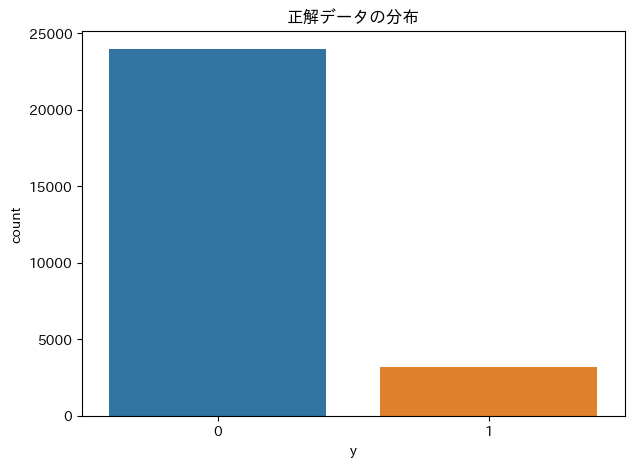

In [10]:
# MatplotlibのFigureを作成する。グラフのサイズを指定する。
plt.figure(figsize=(7,5))

# Seabornのcountplotを使って、train['y']の値の出現回数を数えて棒グラフで表示する。
sns.countplot(x=train['y'], data=train)

# グラフにタイトルを設定する。
plt.title('正解データの分布')

# グラフを表示する。
plt.show()

In [11]:
#カテゴリデータを見るためのdesribe
train.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome
count,27128,27128,27128,27128,27128,27128,27128,27128,27128
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,5886,16411,13882,26644,15125,22788,17580,8317,22150


In [12]:
train_drop = train.copy()
train_drop = train_drop.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], axis=1)
train_drop.corr()

,id,age,balance,day,duration,campaign,pdays,previous,y
id,1.000000,-0.005716,-0.000484,0.002974,0.002705,0.016867,-0.004526,-0.005425,-0.003555
age,-0.005716,1.000000,0.095343,-0.008518,-0.005309,-0.001340,-0.025272,0.002946,0.020892
balance,-0.000484,0.095343,1.000000,0.002067,0.019923,-0.016295,0.003613,0.012483,0.045826
day,0.002974,-0.008518,0.002067,1.000000,-0.032453,0.164880,-0.096889,-0.050009,-0.031058
duration,0.002705,-0.005309,0.019923,-0.032453,1.000000,-0.087771,0.002030,0.002489,0.401390
campaign,0.016867,-0.001340,-0.016295,0.164880,-0.087771,1.000000,-0.086220,-0.031557,-0.076118
pdays,-0.004526,-0.025272,0.003613,-0.096889,0.002030,-0.086220,1.000000,0.421606,0.100930
previous,-0.005425,0.002946,0.012483,-0.050009,0.002489,-0.031557,0.421606,1.000000,0.083825
y,-0.003555,0.020892,0.045826,-0.031058,0.401390,-0.076118,0.100930,0.083825,1.000000


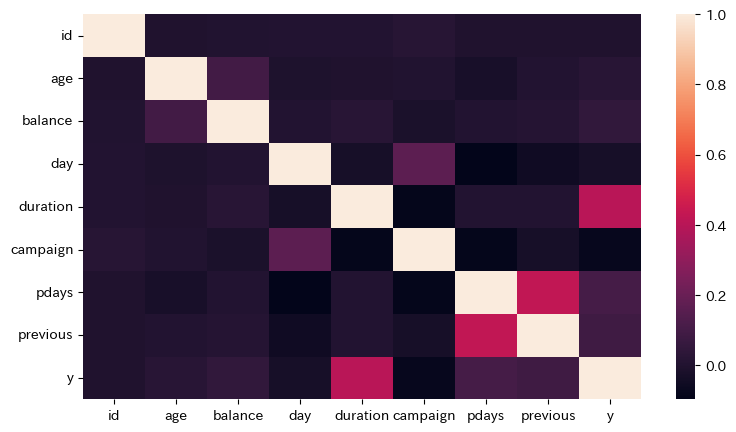

In [13]:
# ヒートマップで可視化
plt.figure(figsize=(9, 5))
sns.heatmap(train_drop.corr())
plt.xticks(rotation=0)
plt.show()

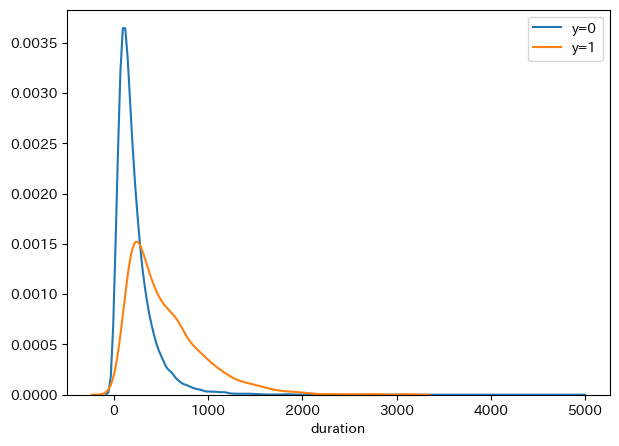

In [14]:
#kdeplotで確率密度関数可視化
plt.figure(figsize=(7,5))
sns.kdeplot(train_drop[train_drop['y']==0]['duration'],label='y=0')
sns.kdeplot(train_drop[train_drop['y']==1]['duration'],label='y=1')
plt.legend()
plt.ylabel('')
plt.show()

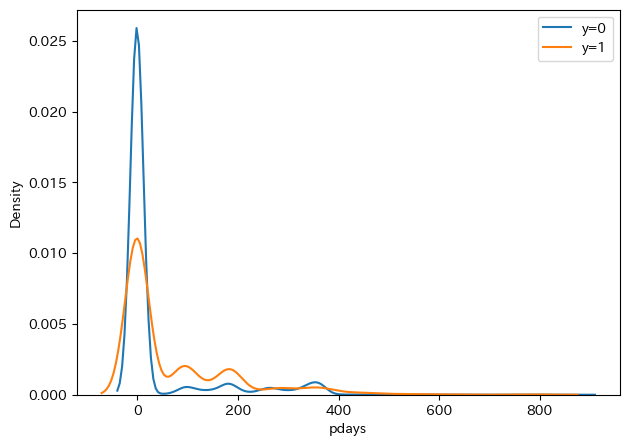

In [15]:
#kdeplotで確率密度関数可視化
plt.figure(figsize=(7,5))
sns.kdeplot(train_drop[train_drop['y']==0]['pdays'],label='y=0')
sns.kdeplot(train_drop[train_drop['y']==1]['pdays'],label='y=1')
plt.legend()
plt.show()

In [16]:
# 負の値があるように見えるので確認
train_drop['pdays'].value_counts()

pdays
-1      22146
 182       98
 92        89
 91        73
 183       72
        ...  
 437        1
 603        1
 779        1
 541        1
 421        1
Name: count, Length: 491, dtype: int64

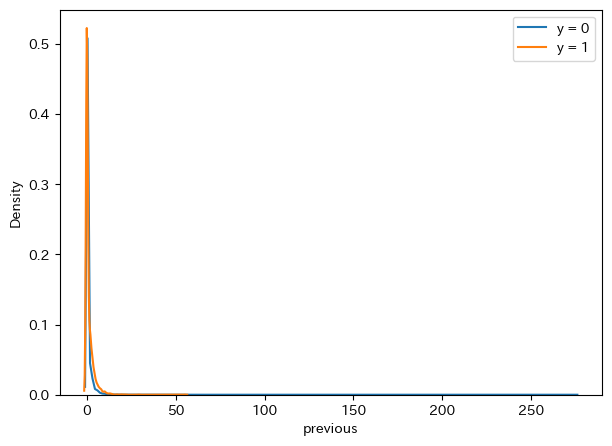

In [17]:
plt.figure(figsize=(7, 5))
sns.kdeplot(train_drop[train_drop['y'] == 0]['previous'], label='y = 0')
sns.kdeplot(train_drop[train_drop['y'] == 1]['previous'], label='y = 1')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
sns.boxplot(train_drop[['duration']])

plt.subplot(1, 3, 2)
sns.boxplot(train_drop[['pdays']])

plt.subplot(1, 3, 3)
sns.boxplot(train_drop[['previous']])

plt.show()